# ROM Data Collected on Sep. 12 from 1pm to 3pm

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import pandas as pd
import numpy as np
# read all '.csv' files
#df = pd.concat([pd.read_csv(f) for f in glob.glob('*.csv')], ignore_index = True)

In [2]:
# Learning agent with parameterized action space
data_para_agent = pd.read_csv('20180912-1pm_2pm.csv')
# Prescribed behavior wit Adam's default paramters
data_baseline = pd.read_csv('20180912-2pm_3pm_baseline.csv')

In [3]:
print('Data of Prescribed behavior: {}'.format(data_baseline.shape))
print('Data of Parameterized Learning Agent: {}'.format(data_para_agent.shape))

Data of Prescribed behavior: (1849, 4)
Data of Parameterized Learning Agent: (916, 4)


In [4]:
data_baseline.columns

Index(['Time', 'Observation', 'Reward', 'Action'], dtype='object')

## Reward Collected From 1pm to 3pm

<IPython.core.display.Javascript object>


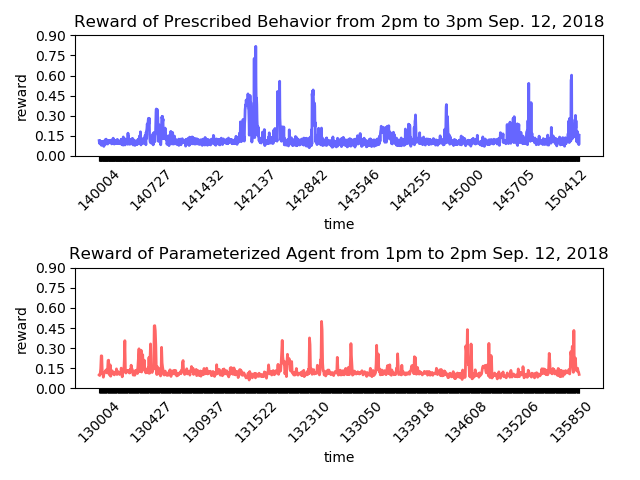

In [5]:
plt.figure()
# Baseline
ax1 = plt.subplot(2, 1, 1)
ax1.plot([time.split('-')[1] for time in data_baseline['Time']], data_baseline['Reward'], 'b-', lw=2, alpha=0.6)
every_nth = 200
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.15))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xlabel('time')
plt.ylabel('reward')
plt.ylim(ymin=0, ymax=0.9)
plt.title('Reward of Prescribed Behavior from 2pm to 3pm Sep. 12, 2018')
#plt.grid(True)

# Parameterized Agent
ax2 = plt.subplot(2, 1, 2)
ax2.plot([time.split('-')[1] for time in data_para_agent['Time']], data_para_agent['Reward'], 'r-', lw=2, alpha=0.6)
every_nth = 100
for n, label in enumerate(ax2.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.15))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xlabel('time')
plt.ylabel('reward')
plt.ylim(ymin=0, ymax=0.9)
plt.title('Reward of Parameterized Agent from 1pm to 2pm Sep. 12, 2018')
#plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
round(len(data_para_agent['Time'])/200)

5

## Histogram of Reward

<IPython.core.display.Javascript object>


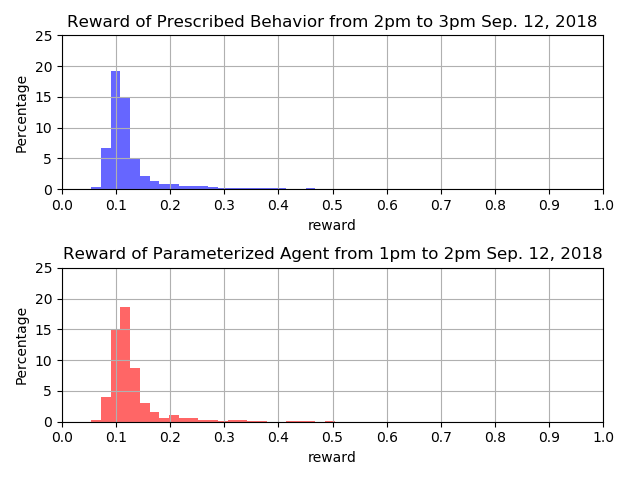

In [7]:
plt.figure(2)
bins = 50
# Baseline
ax3 = plt.subplot(2, 1, 1)
ax3.hist(data_baseline['Reward'], bins, range=(0, 0.9), density = True, color = 'b', alpha=0.6)
plt.xlabel('reward')
plt.ylabel('Percentage')
plt.xlim(0, 1)
plt.ylim(0, 25)
plt.title('Reward of Prescribed Behavior from 2pm to 3pm Sep. 12, 2018')
plt.grid(True)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax3.yaxis.set_major_locator(ticker.MultipleLocator(5))
# Parameterized Agent
ax4 = plt.subplot(2, 1, 2)
ax4.hist(data_para_agent['Reward'], bins, range=(0, 0.9), density = True, color = 'r', alpha=0.6)
plt.xlabel('reward')
plt.ylabel('Percentage')
plt.xlim(0, 1)
plt.ylim(0, 25)
plt.title('Reward of Parameterized Agent from 1pm to 2pm Sep. 12, 2018')
plt.grid(which='both')
ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax4.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()
plt.show()

Put two histograms together to ease comparision.

The static reward is around 0.1.

**observation:**
1. From the Figure, we can see that Parameterized_Agent has more reward in range (0.1, 0.2). 
2. However, Prescribed_Behavior has more rewards higher than 0.5 which indicate reaching hand interaction.

**Analysis:**
1. We need to confirm that if slightly shifting away from static reward means more visitors passing by.
2. Check the video to see what causes visitors more eager to interact with prescribed behavior.
   * If we check the video, the during 2pm to 3pm, there is a small group visitors led by a lady stay for a long time.
   * At the end of the video collect in 2pm-3pm, the security guard was trying to teach a visitor.

<IPython.core.display.Javascript object>


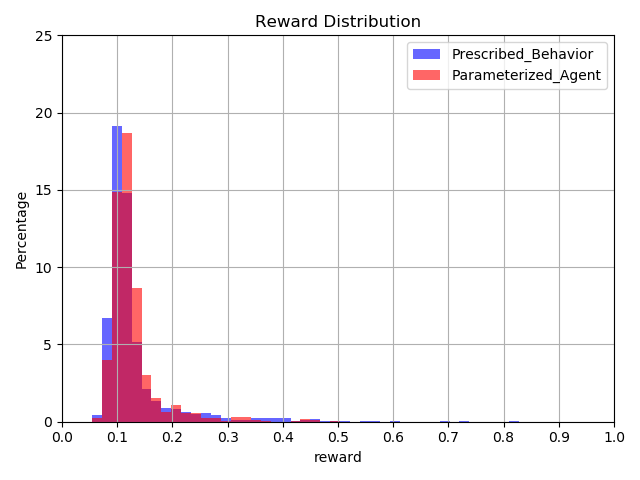

/Users/jack.lingheng.meng/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [8]:
plt.figure()
bins = 50
# Baseline
plt.hist(data_baseline['Reward'], bins, range=(0, 0.9), density = True, color = 'b', alpha=0.6)
# Parameterized Agent
plt.hist(data_para_agent['Reward'], bins, range=(0, 0.9), density = True, color = 'r', alpha=0.6)

plt.xlabel('reward')
plt.ylabel('Percentage')
plt.xlim(0, 1)
plt.ylim(0, 25)
plt.title('Reward Distribution')
plt.grid(True)
plt.legend(('Prescribed_Behavior','Parameterized_Agent'))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()
plt.show()

### Zoom in last Figure
If only look at reward greager than 0.2, it seems Prescribed_Behavior is better than Parameterized_Agent. Of course, this depends on the number of visitors in different time periods.

<IPython.core.display.Javascript object>


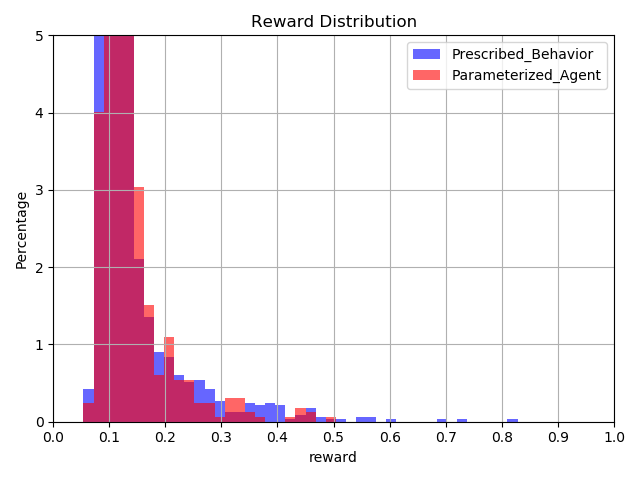

/Users/jack.lingheng.meng/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [9]:
plt.figure()
bins = 50
# Baseline
plt.hist(data_baseline['Reward'], bins, range=(0, 0.9), density = True, color = 'b', alpha=0.6)
# Parameterized Agent
plt.hist(data_para_agent['Reward'], bins, range=(0, 0.9), density = True, color = 'r', alpha=0.6)

plt.xlabel('reward')
plt.ylabel('Percentage')
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.title('Reward Distribution')
plt.grid(True)
plt.legend(('Prescribed_Behavior','Parameterized_Agent'))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.tight_layout()
plt.show()

## Video of Camera1 from 1pm to 3pm
1. YouTube: ROM Camera1 Sep 12 from 2pm to 3pm-baseline
   * [Raw Video](https://youtu.be/Bl3uG9aIdaA)
   * [Processed Video](https://youtu.be/HZdJoRUdmOU)
2. YouTube: ROM Camera1 Sep 12 from 1pm to 2pm - Parameterized Learning Agent
   * [Raw Video](https://youtu.be/uldVgU20xWE)
   * [Processed Video](https://youtu.be/fdK-3royknc)

In [10]:
processed_occupancy_para_agent = pd.read_csv('Camera1_Sep_12_1pm_2pm_processed_occupancy.txt', sep=',', header=None)
processed_occupancy_baseline = pd.read_csv('Camera1_Sep_12_2pm_3pm_processed_occupancy.txt', sep=',', header=None)

In [11]:
print('processed_occupancy_para_agent columns:{}'.format(processed_occupancy_para_agent.columns))
print('processed_occupancy_baseline columns:{}'.format(processed_occupancy_baseline.columns))

processed_occupancy_para_agent columns:Int64Index([0, 1], dtype='int64')
processed_occupancy_baseline columns:Int64Index([0, 1], dtype='int64')


<IPython.core.display.Javascript object>


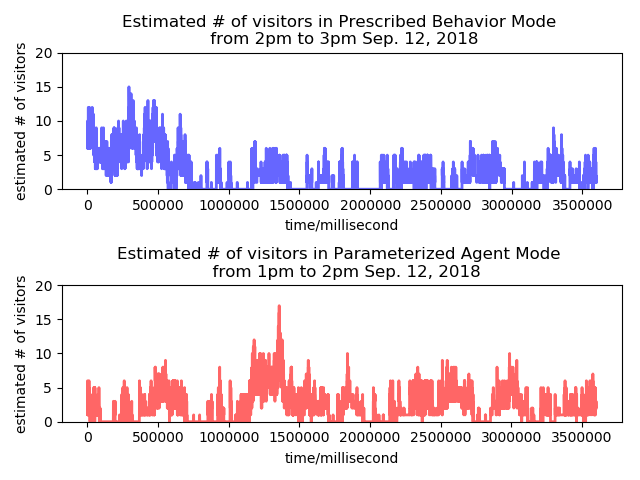

In [12]:
plt.figure()
# Baseline
plt.subplot(2, 1, 1)
plt.plot(processed_occupancy_para_agent[0], processed_occupancy_para_agent[1], 'b-', lw=2, alpha=0.6)
plt.xlabel('time/millisecond')
plt.ylabel('estimated # of visitors')
plt.ylim(ymin=0, ymax=20)
plt.title('Estimated # of visitors in Prescribed Behavior Mode \n from 2pm to 3pm Sep. 12, 2018')
#plt.grid(True)

# Parameterized Agent
plt.subplot(2, 1, 2)
plt.plot(processed_occupancy_baseline[0], processed_occupancy_baseline[1], 'r-', lw=2, alpha=0.6)
plt.xlabel('time/millisecond')
plt.ylabel('estimated # of visitors')
plt.ylim(ymin=0, ymax=20)
plt.title('Estimated # of visitors in Parameterized Agent Mode \n  from 1pm to 2pm Sep. 12, 2018')
#plt.grid(True)

plt.tight_layout()
plt.show()

# Data Collected on Sep. 13
**Note:**
1. The reward calculated by my baseline_agent is "max_pool_sensory_readings" (20 observations is grouped into 4 groups, then find maximum IR value in each group as the obervation of that group, after that concatenate 4 observations as one combined observation. The reward is to sum up the 4$\times $24 IR values.) However, in Daiwei's code the reward is based on the sum of the average of 20 fed observations. Therefore, we can only compare the change trend of the reward from baseline_agent and Daiwei's Learning_Agent.
2. The baseline data is collected from 2:30pm to 5:30pm, while Daiwei's data is from 1pm to 1:30pm.
The following **Figure** is the reward collected by baseline_agent.

<img src="./Sep_13_baseline_reward.png"  /> 

In [13]:
data_baseline_Sep_13 = pd.read_csv('20180913-2_30pm-5_30pm_reward.csv')
reward_baseline_Sep_13 = data_baseline_Sep_13['Value']

data_para_agent_Sep_13 = pd.read_csv('20180913-1pm-1_30pm.csv')
reward_para_agent_Sep_13 = data_para_agent_Sep_13['Reward']

In [14]:
data_baseline_Sep_13.columns
data_para_agent_Sep_13.columns

Index(['Observation', 'Action', 'Reward'], dtype='object')

<IPython.core.display.Javascript object>


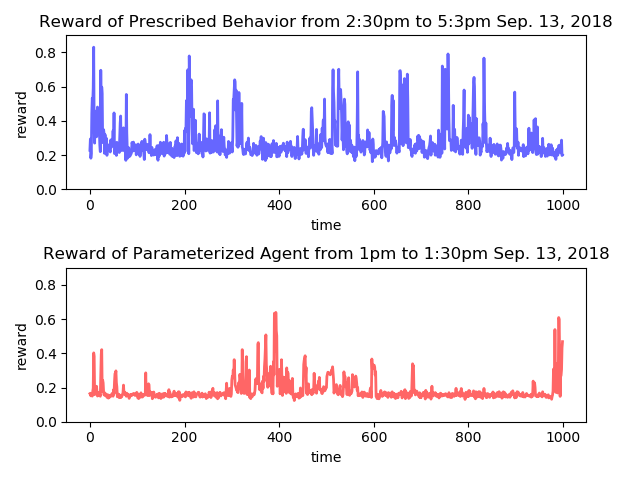

In [15]:
import numpy as np
plt.figure()
# Baseline
ax_t = plt.subplot(2, 1, 1)
ax_t.plot(np.arange(len(reward_baseline_Sep_13)), reward_baseline_Sep_13, 'b-', lw=2, alpha=0.6)
#every_nth = 200
#for n, label in enumerate(ax_t.xaxis.get_ticklabels()):
#    if n % every_nth != 0:
#        label.set_visible(False)
#ax_t.yaxis.set_major_locator(ticker.MultipleLocator(0.15))
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=45)
plt.xlabel('time')
plt.ylabel('reward')
plt.ylim(ymin=0, ymax=0.9)
plt.title('Reward of Prescribed Behavior from 2:30pm to 5:3pm Sep. 13, 2018')
#plt.grid(True)

# Parameterized Agent
ax2 = plt.subplot(2, 1, 2)
ax2.plot(np.arange(len(reward_para_agent_Sep_13)), reward_para_agent_Sep_13, 'r-', lw=2, alpha=0.6)
#every_nth = 100
#for n, label in enumerate(ax2.xaxis.get_ticklabels()):
#    if n % every_nth != 0:
#        label.set_visible(False)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.15))
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=45)
plt.xlabel('time')
plt.ylabel('reward')
plt.ylim(ymin=0, ymax=0.9)
plt.title('Reward of Parameterized Agent from 1pm to 1:30pm Sep. 13, 2018')
#plt.grid(True)

plt.tight_layout()
plt.show()